In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew, kurtosis
import seaborn as sns
# Đọc dữ liệu từ file
df = pd.read_csv('babies.txt', delim_whitespace=True)

# Phân chia dữ liệu thành hai nhóm
smoke_1 = df[df['smoke'] == 1]['bwt']
smoke_0 = df[df['smoke'] == 0]['bwt']

# Tính toán các đại lượng thống kê
stats = {
    'Category': ['Mother Smokes', 'Mother Does Not Smoke'],
    'Count': [len(smoke_1), len(smoke_0)],
    'Min': [np.min(smoke_1), np.min(smoke_0)],
    'Max': [np.max(smoke_1), np.max(smoke_0)],
    'Mean': [np.mean(smoke_1), np.mean(smoke_0)],
    'Std': [np.std(smoke_1, ddof=1), np.std(smoke_0, ddof=1)],
    'Var': [np.var(smoke_1, ddof=1), np.var(smoke_0, ddof=1)],
    'Median': [np.median(smoke_1), np.median(smoke_0)],
    'Quantile 0%': [np.percentile(smoke_1, 0), np.percentile(smoke_0, 0)],
    'Quantile 25%': [np.percentile(smoke_1, 25), np.percentile(smoke_0, 25)],
    'Quantile 50%': [np.percentile(smoke_1, 50), np.percentile(smoke_0, 50)],
    'Quantile 75%': [np.percentile(smoke_1, 75), np.percentile(smoke_0, 75)],
    'IQR': [np.percentile(smoke_1, 75) - np.percentile(smoke_1, 25),
            np.percentile(smoke_0, 75) - np.percentile(smoke_0, 25)],
    'Skewness': [skew(smoke_1), skew(smoke_0)],
    'Kurtosis': [kurtosis(smoke_1), kurtosis(smoke_0, fisher=False)]
}

# Tạo DataFrame để hiển thị kết quả
stats_df = pd.DataFrame(stats)
print(stats_df)


                Category  Count  Min  Max        Mean        Std         Var  \
0          Mother Smokes    484   58  163  114.109504  18.098946  327.571835   
1  Mother Does Not Smoke    742   55  176  123.047170  17.398689  302.714371   

   Median  Quantile 0%  Quantile 25%  Quantile 50%  Quantile 75%   IQR  \
0   115.0         58.0         102.0         115.0         126.0  24.0   
1   123.0         55.0         113.0         123.0         134.0  21.0   

   Skewness  Kurtosis  
0 -0.033595 -0.011968  
1 -0.186984  4.037060  


 **Xét tập dữ liệu ứng với trường hợp bà mẹ không hút thuốc**

Vị trí tập trung của dữ liệu: khoảng giá trị: 123-124\
Tính biến động của dữ liệu:
- Phương sai (variance): var= 302.7143711964963
- Độ lệch chuẩn (standard deviation): sd= 17.39868877808027
- Khoảng giá trị: min=55, max=176, range=121
- Khoảng cách giữa 2 phần tư vị: IQR=Q3-Q1= 134-113 = 121
Nhận xét: Khoảng cách giữa các phần tư vị cũng thấp hơn so với trường hợp bà mẹ hút thuốc, cho thấy dữ liệu tập trung hơn.

**Hình dạng phân bố của dữ liệu:**\
- Độ lệch: Skewness=-0.18698408606617228
- Độ bè nhọn của đỉnh dữ liệu: Kurtosis=4.037060312433822\
Nhận xét: Điều này có nghĩa là phần lớn dữ liệu tập trung quanh giá trị trung bình với ít giá trị cực đoan (outliers).

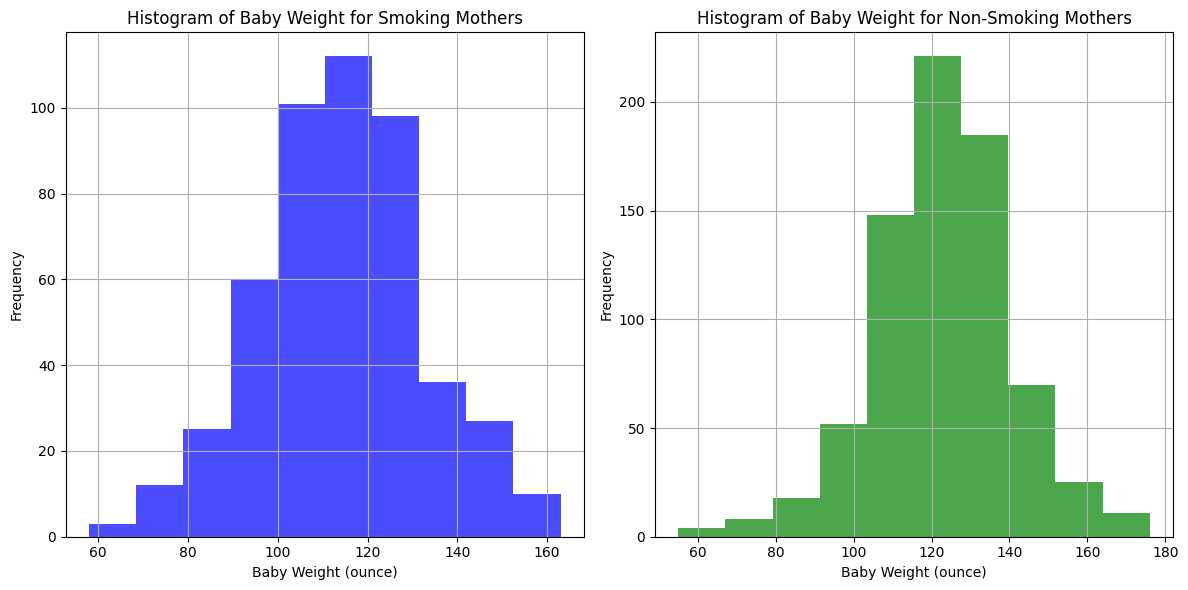

In [ ]:
# Tạo histogram
plt.figure(figsize=(12, 6))

# Histogram cho nhóm bà mẹ hút thuốc
plt.subplot(1, 2, 1)
plt.hist(smoke_1, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Baby Weight for Smoking Mothers')
plt.xlabel('Baby Weight (ounce)')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram cho nhóm bà mẹ không hút thuốc
plt.subplot(1, 2, 2)
plt.hist(smoke_0, bins=10, color='green', alpha=0.7)
plt.title('Histogram of Baby Weight for Non-Smoking Mothers')
plt.xlabel('Baby Weight (ounce)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

<ipython-input-22-585f8b35cb3b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoke', y='bwt', data=df, palette=['blue', 'green'])
<ipython-input-22-585f8b35cb3b>:5: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='smoke', y='bwt', data=df, palette=['blue', 'green'])


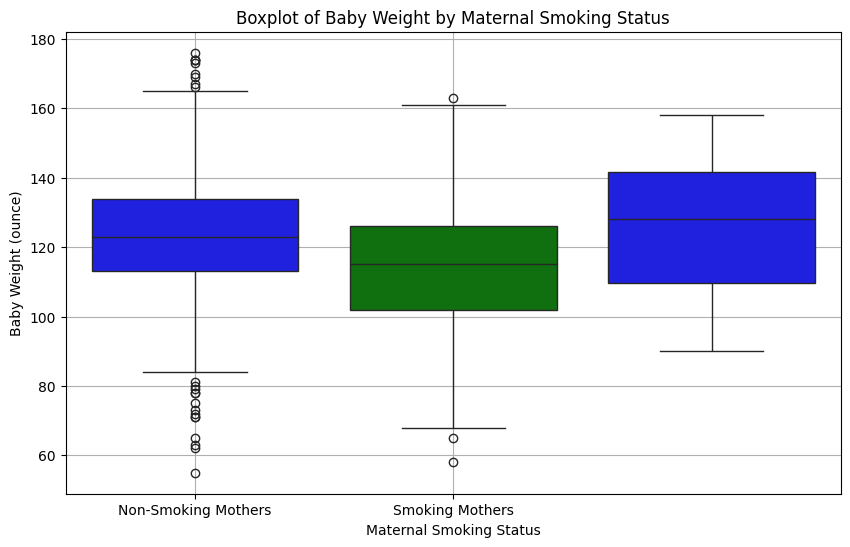

In [ ]:
# Tạo boxplot
plt.figure(figsize=(10, 6))

# Boxplot cho cả hai nhóm
sns.boxplot(x='smoke', y='bwt', data=df, palette=['blue', 'green'])
plt.xticks([0, 1], ['Non-Smoking Mothers', 'Smoking Mothers'])
plt.title('Boxplot of Baby Weight by Maternal Smoking Status')
plt.xlabel('Maternal Smoking Status')
plt.ylabel('Baby Weight (ounce)')
plt.grid(True)

plt.show()

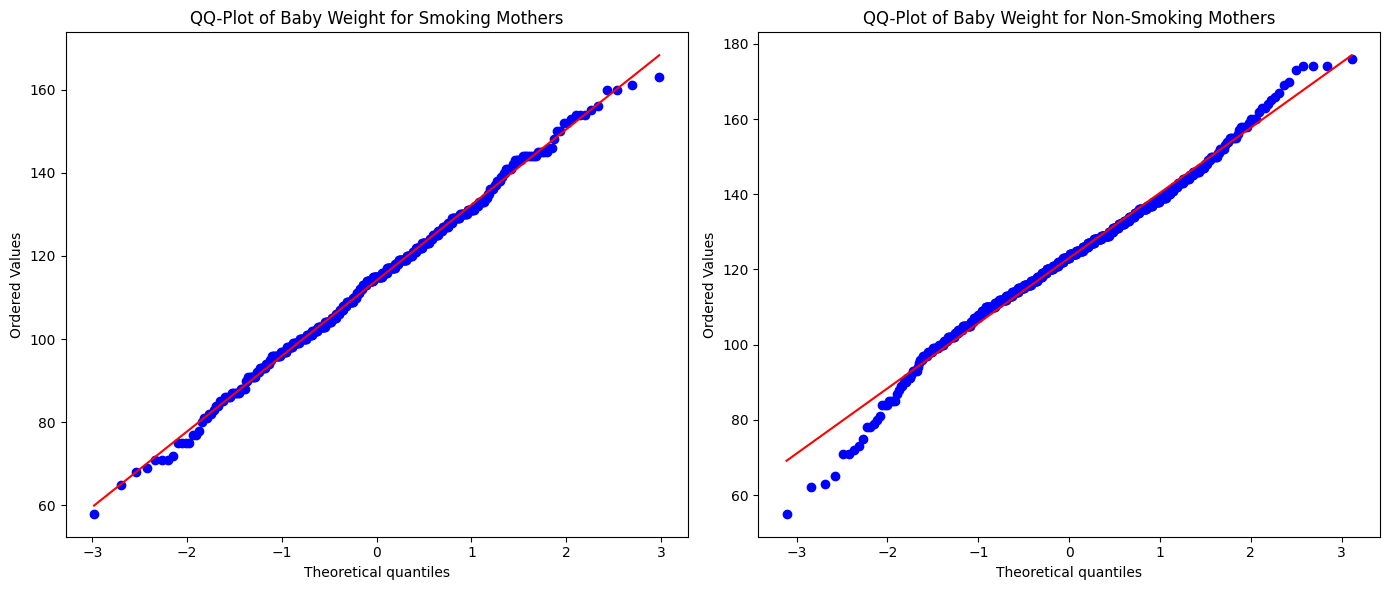

In [ ]:
# Tạo QQ-Plot cho nhóm bà mẹ hút thuốc
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
stats.probplot(smoke_1, dist="norm", plot=plt)
plt.title('QQ-Plot of Baby Weight for Smoking Mothers')

# Tạo QQ-Plot cho nhóm bà mẹ không hút thuốc
plt.subplot(1, 2, 2)
stats.probplot(smoke_0, dist="norm", plot=plt)
plt.title('QQ-Plot of Baby Weight for Non-Smoking Mothers')

plt.tight_layout()
plt.show()